# 🌍 Global Temperature Trends Analysis
### Using Python, NumPy, Pandas & Matplotlib

This project analyzes global temperature changes using historical weather data from the [NOAA / Berkeley Earth dataset](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). We will explore temperature trends across major cities from 1900 to 2013.

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
print("Libraries loaded successfully!")

Libraries loaded successfully!


## 📂 Step 2: Load the Dataset
Download the dataset from Kaggle and place the CSV file in the same folder as this notebook.

In [2]:
# Step 2: Load dataset
df = pd.read_csv("GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


## 🧹 Step 3: Clean and Prepare Data

In [3]:
# Step 3: Data cleaning
df = df.dropna(subset=['AverageTemperature'])
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

# Focus on data from 1900 onward
df = df[df['Year'] >= 1900]
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
1874,1900-01-01,-0.989,0.588,Århus,Denmark,57.05N,10.33E,1900,1
1875,1900-02-01,-2.799,0.882,Århus,Denmark,57.05N,10.33E,1900,2
1876,1900-03-01,0.592,0.429,Århus,Denmark,57.05N,10.33E,1900,3
1877,1900-04-01,4.630,0.417,Århus,Denmark,57.05N,10.33E,1900,4
1878,1900-05-01,9.576,0.521,Århus,Denmark,57.05N,10.33E,1900,5


## 🌆 Step 4: Filter for Major Cities

In [4]:
cities = ['New York', 'Delhi', 'London', 'Tokyo', 'Sydney']
city_df = df[df['City'].isin(cities)]
city_avg = city_df.groupby(['City', 'Year'])['AverageTemperature'].mean().reset_index()
city_avg.head()

,City,Year,AverageTemperature
0,Delhi,1900,25.559667
1,Delhi,1901,25.493167
2,Delhi,1902,25.660833
3,Delhi,1903,25.141000
4,Delhi,1904,25.068583


## 📊 Step 5: Visualize Temperature Trends by City

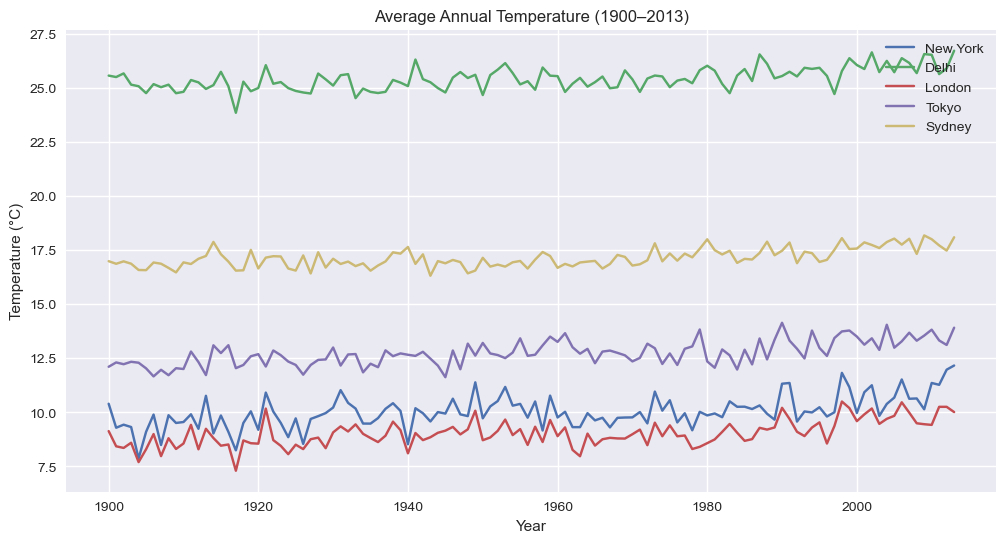

In [5]:
plt.figure(figsize=(12,6))
for city in cities:
    data = city_avg[city_avg['City'] == city]
    plt.plot(data['Year'], data['AverageTemperature'], label=city)

plt.title("Average Annual Temperature (1900–2013)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

## 🔢 Step 6: Analyze Temperature Change Using NumPy

In [6]:
for city in cities:
    data = city_avg[city_avg['City'] == city]
    temps = data['AverageTemperature'].values
    years = data['Year'].values
    slope, intercept = np.polyfit(years, temps, 1)
    print(f"{city}: Temperature increases by {slope:.3f}°C per year")

New York: Temperature increases by 0.012°C per year
Delhi: Temperature increases by 0.009°C per year
London: Temperature increases by 0.011°C per year
Tokyo: Temperature increases by 0.011°C per year
Sydney: Temperature increases by 0.008°C per year


## 🧠 Step 7: Trend Line Visualization for One City

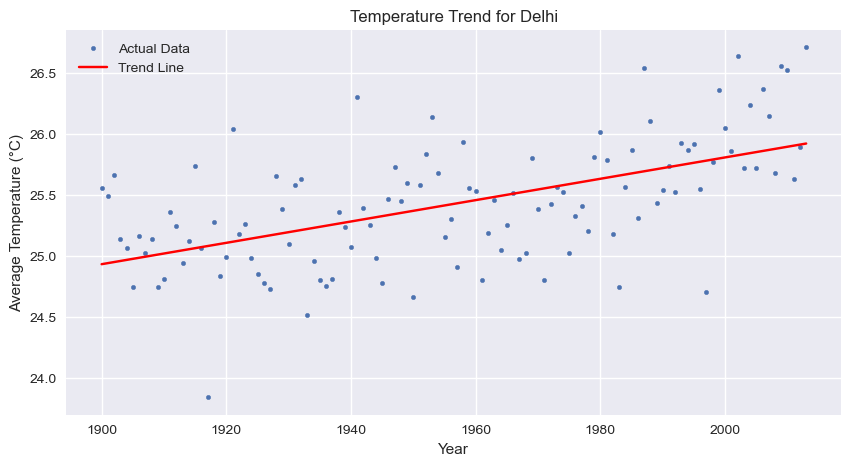

In [7]:
city = 'Delhi'
data = city_avg[city_avg['City'] == city]
years = data['Year']
temps = data['AverageTemperature']

slope, intercept = np.polyfit(years, temps, 1)
trend = slope * years + intercept

plt.figure(figsize=(10,5))
plt.scatter(years, temps, s=10, label='Actual Data')
plt.plot(years, trend, color='red', label='Trend Line')
plt.title(f"Temperature Trend for {city}")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.show()

## 🌡️ Step 8: Global Average Temperature Over Time

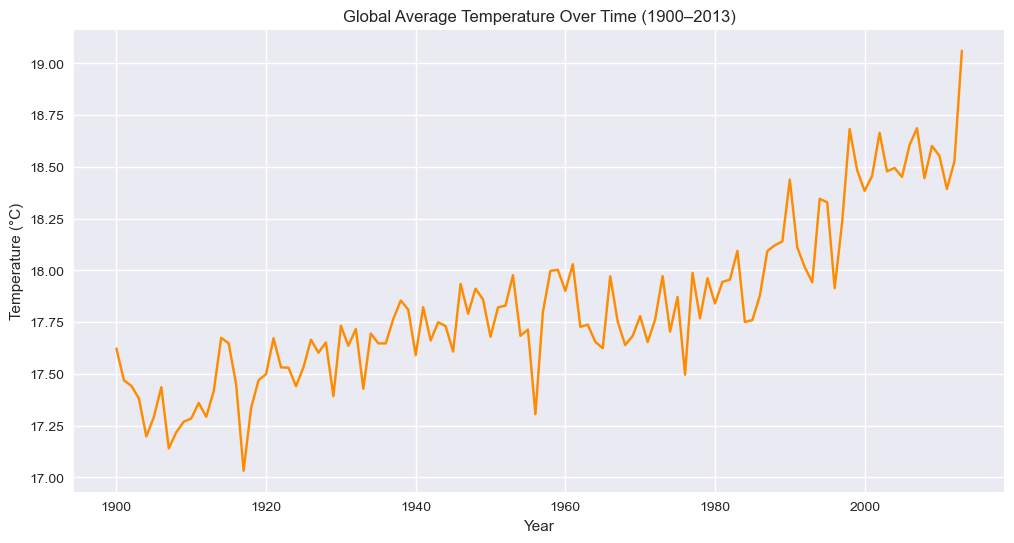

In [8]:
global_avg = df.groupby('Year')['AverageTemperature'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(global_avg['Year'], global_avg['AverageTemperature'], color='darkorange')
plt.title("Global Average Temperature Over Time (1900–2013)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

## 📈 Step 9: Correlation Between Cities

In [9]:
pivot = city_avg.pivot(index='Year', columns='City', values='AverageTemperature')
corr = pivot.corr()
print("Temperature Correlation Between Cities:")
print(corr)

Temperature Correlation Between Cities:
City         Delhi    London  New York    Sydney     Tokyo
City                                                      
Delhi     1.000000  0.529113  0.556307  0.550271  0.479669
London    0.529113  1.000000  0.875540  0.505853  0.509143
New York  0.556307  0.875540  1.000000  0.464454  0.447429
Sydney    0.550271  0.505853  0.464454  1.000000  0.548952
Tokyo     0.479669  0.509143  0.447429  0.548952  1.000000


## 🏁 Step 10: Conclusion
### 🔍 Findings:
- Global temperature has shown a steady increase since 1900.
- All cities analyzed exhibit a warming trend.
- Strong correlations exist between different global regions.

### 🧠 Skills Demonstrated:
- **Pandas** for data cleaning and manipulation.
- **NumPy** for mathematical trend analysis.
- **Matplotlib** for data visualization.
- **Jupyter Notebook** for interactive exploration and presentation.